In [1]:
import numpy as np
import matplotlib.pyplot as plt
from da_svm import linear_svm_hyperplane, da_svm_hyperplane

## Implementation of Domain Adaptation Support Vector Machine

**1. Origin dataset visualization**

In [2]:
src_trainset = np.loadtxt('./data/source_train.csv', delimiter=',')
tgt_trainset = np.loadtxt('./data/target_train.csv', delimiter=',')


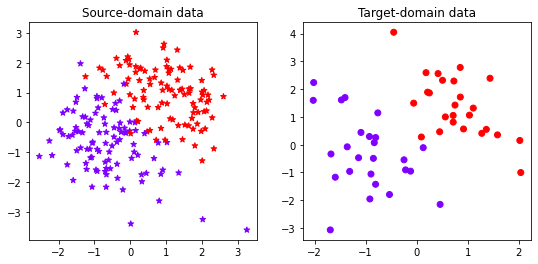

In [3]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.scatter(src_trainset[:,0], src_trainset[:,1], c=src_trainset[:,2], marker='*', cmap=plt.cm.rainbow)
plt.title('Source-domain data')

plt.subplot(1,2,2)
plt.scatter(tgt_trainset[:,0], tgt_trainset[:,1], c=tgt_trainset[:,2], cmap=plt.cm.rainbow)
plt.title('Target-domain data')
plt.show()

**2. Hyperplane solving in the source domain**

In [20]:
w_s, b_s = linear_svm_hyperplane(src_trainset[:,:2], src_trainset[:,2], C=5, return_bias=True, dual=False)
print(w_s, b_s)

[2.31500233 2.14257093] -0.7971199741016871


*if you use the approach to solving the dual problem, the correct result can be acquired, too*

In [21]:
print(*da_svm_hyperplane(tgt_trainset[:, :2], tgt_trainset[:, 2], w_s, B=1, C=5, return_bias=True))

[3.3342743 2.3723645] -1.1744272907324311


In [22]:
x1 = np.linspace(src_trainset[:,0].min(), src_trainset[:,0].max())
x2 = - (w_s[0] * x1 + b_s) / w_s[1]

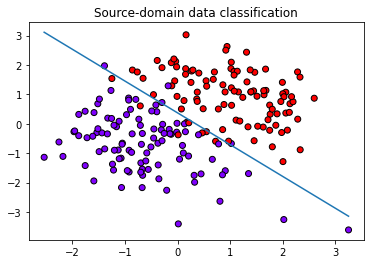

In [25]:
plt.scatter(src_trainset[:,0], src_trainset[:,1], c=src_trainset[:,2], cmap=plt.cm.rainbow, edgecolors='k')
plt.plot(x1,x2)
plt.title('Source-domain data classification')
# plt.savefig('source-domain-hyperplane.png')
plt.show()


3. Domain Adaptation SVM hyperplane




In [26]:
w_t, b_t = da_svm_hyperplane(tgt_trainset[:,:2], tgt_trainset[:,2], w_s, B = 0.1, C=5, return_bias=True)
print(w_t, b_t)

[2.28140427 1.1264323 ] -0.5511010993735738


In [27]:
# dual solving approach
# w_t, b_t = da_svm_hyperplane(tgt_trainset[:,:2], tgt_trainset[:,2], w_s, B = 0.1, C=5, return_bias=True, dual=True)
# print(w_t, b_t)

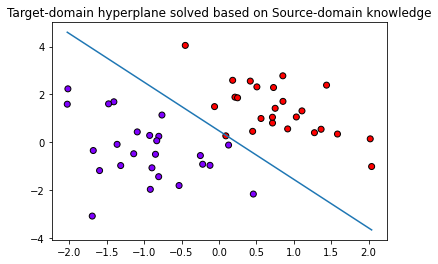

In [28]:
x1 = np.linspace(tgt_trainset[:,0].min(), tgt_trainset[:,0].max())
x2 = - (w_t[0] * x1 + b_t) / w_t[1]

plt.scatter(tgt_trainset[:, 0], tgt_trainset[:, 1], c=tgt_trainset[:, 2], cmap=plt.cm.rainbow, edgecolors='k')
plt.plot(x1, x2)
plt.title('Target-domain hyperplane solved based on Source-domain knowledge')
# plt.savefig('target-domain-hyperplane.png')
plt.show()

